<a href="https://colab.research.google.com/github/snigdhashoily/-Data-Mining-Lab/blob/main/P_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 03
# Data Mining Lab
Course Code: CSE426

Course Title: Data Mining Lab

Submitted By

Name: Sinigdha Akter Shoily

ID: 212 505 1044

Section: 8A

Batch: 50th

Semester: Spring 2024

Department: CSE

Supervised By

Name: Mrinmoy Biswas Akash

Lecturer

Dept. of CSE (UITS)

Date:04-07-2025

# Building a Domain-Specific Search Engine with Crawling and Link Analysis

# Crawling Phase

In [14]:
import requests
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import defaultdict
import re
from urllib.parse import urljoin, urlparse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Set stopwords
STOPWORDS = stopwords.words('english')
custom_STOPWORDS = []
STOPWORDS.extend(custom_STOPWORDS)

In [4]:
# Data Structures
inverted_index = defaultdict(set)
url_list = set()
web_connection = {'source': [], 'target': []}

In [5]:
# Clean and tokenize text content
def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    tokens = text.split()
    return [t for t in tokens if t not in STOPWORDS and len(t) > 1]

In [8]:
# Crawl a single URL recursively
def crawl(url, base_domain, visited, visit_limit, limit):
    if limit == 0 or len(visited) == visit_limit:
        return
    try:
        response = requests.get(url, timeout=5)
        if response.status_code != 200:
            return
    except requests.RequestException:
        return

    visited.add(url)
    print("-" * (10 - limit), f"Crawled: {url}")
    soup = BeautifulSoup(response.text, 'html.parser')
    text = soup.get_text(separator=' ', strip=True)
    words = clean_and_tokenize(text)

    for word in words:
        inverted_index[word].add(url)
        url_list.add(url)

    for tag in soup.find_all('a', href=True):
        link = urljoin(url, tag['href'])
        parsed = urlparse(link)

       # Store all links for web graph
        web_connection['source'].append(url)
        web_connection['target'].append(link)

        if parsed.netloc == base_domain and link not in visited:
            crawl(link, base_domain, visited, visit_limit, limit - 1)

In [9]:
# Root-level crawler
def crawl_roots(root_urls, max_per_root=2, visit_limit=50):
    for root in root_urls:
        print(f"\nStarting crawl from: {root}")
        domain = urlparse(root).netloc
        visited = set()
        crawl(root, domain, visited, visit_limit, max_per_root)

# Seed URLs for domain: World News
seed_urls = [
    'https://www.bbc.com/news',
    'https://www.theguardian.com/world',
]

In [10]:
# Start crawling
crawl_roots(seed_urls, max_per_root=10)


Starting crawl from: https://www.bbc.com/news
 Crawled: https://www.bbc.com/news
- Crawled: https://www.bbc.com/news#main-content
-- Crawled: https://www.bbc.com/watch-live-news/
--- Crawled: https://www.bbc.com/watch-live-news/#main-content
---- Crawled: https://www.bbc.com/
----- Crawled: https://www.bbc.com/#main-content
------ Crawled: https://www.bbc.com/sport
------- Crawled: https://www.bbc.com
-------- Crawled: https://www.bbc.com#main-content
--------- Crawled: https://www.bbc.com/business
--------- Crawled: https://www.bbc.com/innovation
--------- Crawled: https://www.bbc.com/culture
--------- Crawled: https://www.bbc.com/arts
--------- Crawled: https://www.bbc.com/travel
--------- Crawled: https://www.bbc.com/future-planet
--------- Crawled: https://www.bbc.com/audio
--------- Crawled: https://www.bbc.com/video
--------- Crawled: https://www.bbc.com/live
--------- Crawled: https://www.bbc.com/home
--------- Crawled: https://www.bbc.com/news/topics/c2vdnvdg6xxt
--------- Cra

In [11]:
# Display sample inverted index
print("\nSample inverted index (first 20 words):")
for word in list(inverted_index.keys())[:20]:
    print(f"{word}: {list(inverted_index[word])}")


Sample inverted index (first 20 words):
bbc: ['https://www.bbc.com/news/scotland/scotland_politics', 'https://www.bbc.com/news/bbcindepth', 'https://www.bbc.com/innovation/artificial-intelligence', 'https://www.bbc.com/watch-live-news/#main-content', 'https://www.bbc.com/culture', 'https://www.bbc.com/live', 'https://www.bbc.com/video', 'https://www.theguardian.com/preference/edition/us', 'https://www.bbc.com/#main-content', 'https://www.bbc.com/culture/film-tv', 'https://www.bbc.com/news/northern_ireland', 'https://www.bbc.com/innovation', 'https://www.bbc.com/news/world/europe', 'https://www.bbc.com', 'https://www.bbc.com/news/world/asia/china', 'https://www.bbc.com/business/technology-of-business', 'https://www.bbc.com/innovation/technology', 'https://www.bbc.com/', 'https://www.bbc.com/home', 'https://www.bbc.com/future-planet', 'https://www.bbc.com/news/northern_ireland/northern_ireland_politics', 'https://www.bbc.com/news/war-in-ukraine', 'https://www.bbc.com/business/executive-

In [12]:
# Display first 20 web connections
print("\nSample web connections (first 20):")
for source, target in list(zip(web_connection['source'], web_connection['target']))[:20]:
    print(f"{source} -> {target}")


Sample web connections (first 20):
https://www.bbc.com/news -> https://www.bbc.com/news#main-content
https://www.bbc.com/news#main-content -> https://www.bbc.com/news#main-content
https://www.bbc.com/news#main-content -> https://www.bbc.com/watch-live-news/
https://www.bbc.com/watch-live-news/ -> https://www.bbc.com/watch-live-news/#main-content
https://www.bbc.com/watch-live-news/#main-content -> https://www.bbc.com/watch-live-news/#main-content
https://www.bbc.com/watch-live-news/#main-content -> https://www.bbc.com/watch-live-news/
https://www.bbc.com/watch-live-news/#main-content -> https://www.bbc.com/
https://www.bbc.com/ -> https://www.bbc.com/#main-content
https://www.bbc.com/#main-content -> https://www.bbc.com/#main-content
https://www.bbc.com/#main-content -> https://www.bbc.com/watch-live-news/
https://www.bbc.com/#main-content -> https://www.bbc.com/
https://www.bbc.com/#main-content -> https://www.bbc.com/
https://www.bbc.com/#main-content -> https://www.bbc.com/news
htt

#Searching Phase

In [13]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# Load web graph and content
edges_df = pd.read_csv('/content/drive/MyDrive/DM Final/web_graph.csv')
content_df = pd.DataFrame({'Source': edges_df['Source'].unique(), 'Content': [f"Content for {url}" for url in edges_df['Source'].unique()]})

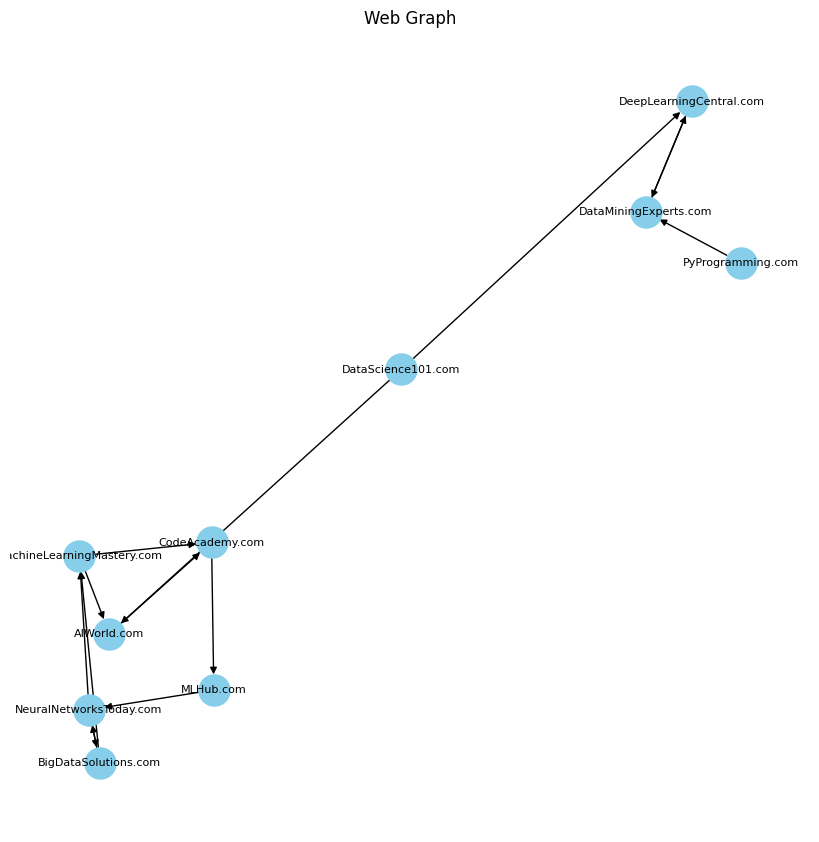

In [19]:
# Create directed graph
web_graph = nx.DiGraph()
for _, row in edges_df.iterrows():
    web_graph.add_edge(row["Source"], row["Target"])

# Visualize web graph
plt.figure(figsize=(8, 8))
nx.draw(web_graph, with_labels=True, node_size=500, node_color="skyblue", font_size=8, font_color="black", arrowsize=10)
plt.title("Web Graph")
plt.show()

In [21]:
# Load web content into dictionary
# Using 'Source' as the key and 'Content' as the value
web_content = dict(zip(content_df["Source"], content_df["Content"]))

# Show graph stats
print("Nodes:", web_graph.number_of_nodes())
print("Edges:", web_graph.number_of_edges())

# Display some of the content
print("\nSample Website Content:")
for site, content in list(web_content.items())[:5]:
    print(f"{site}:\n{content[:150]}...\n")

Nodes: 10
Edges: 14

Sample Website Content:
CodeAcademy.com:
Content for CodeAcademy.com...

DataScience101.com:
Content for DataScience101.com...

MachineLearningMastery.com:
Content for MachineLearningMastery.com...

PyProgramming.com:
Content for PyProgramming.com...

DeepLearningCentral.com:
Content for DeepLearningCentral.com...



In [22]:
#Link Analysis
# HITS Algorithm
hubs, authorities = nx.hits(web_graph, max_iter=100, tol=1e-6)
print("\nHITS - Hub Scores:")
print(hubs)
print("\nHITS - Authority Scores:")
print(authorities)

# PageRank Algorithm
pagerank_scores = nx.pagerank(web_graph, alpha=0.85, max_iter=100, tol=1e-6)
print("\nPageRank Scores:")
print(pagerank_scores)


HITS - Hub Scores:
{'CodeAcademy.com': -4.064709941040861e-18, 'MLHub.com': 6.503535905665378e-17, 'DataScience101.com': 0.35355339059327373, 'DeepLearningCentral.com': -1.2702218565752693e-17, 'MachineLearningMastery.com': 0.35355339059327373, 'AIWorld.com': 0.1464466094067262, 'PyProgramming.com': -1.2702218565752693e-17, 'DataMiningExperts.com': 0.14644660940672627, 'NeuralNetworksToday.com': 8.129419882081725e-17, 'BigDataSolutions.com': 3.251767952832689e-17}

HITS - Authority Scores:
{'CodeAcademy.com': 0.29289321881345237, 'MLHub.com': -8.129419882081721e-18, 'DataScience101.com': -0.0, 'DeepLearningCentral.com': 0.2928932188134524, 'MachineLearningMastery.com': -6.503535905665377e-17, 'AIWorld.com': 0.41421356237309487, 'PyProgramming.com': -0.0, 'DataMiningExperts.com': -2.540443713150538e-17, 'NeuralNetworksToday.com': 1.3007071811330753e-16, 'BigDataSolutions.com': 2.276237566982882e-16}

PageRank Scores:
{'CodeAcademy.com': 0.1203296561037154, 'MLHub.com': 0.11728020765387

In [26]:
# Build inverted index from web content
def build_inverted_index(web_content):
    index = {}
    for website, content in web_content.items():
        # Basic tokenization and lowercasing
        words = content.lower().split()
        for word in words:
            # Simple check to remove punctuation attached to words
            word = re.sub(r'[^a-zA-Z0-9]', '', word)
            if word and word not in index:
                index[word] = []
            if word:
                index[word].append(website)
    return index

# Generate inverted index
index = build_inverted_index(web_content)

# Show index sample
print("\nSample Inverted Index:")
for word, websites in list(index.items())[:10]:
    print(f"{word}: {websites}")


Sample Inverted Index:
content: ['CodeAcademy.com', 'DataScience101.com', 'MachineLearningMastery.com', 'PyProgramming.com', 'DeepLearningCentral.com', 'NeuralNetworksToday.com', 'BigDataSolutions.com', 'AIWorld.com', 'MLHub.com', 'DataMiningExperts.com']
for: ['CodeAcademy.com', 'DataScience101.com', 'MachineLearningMastery.com', 'PyProgramming.com', 'DeepLearningCentral.com', 'NeuralNetworksToday.com', 'BigDataSolutions.com', 'AIWorld.com', 'MLHub.com', 'DataMiningExperts.com']
codeacademycom: ['CodeAcademy.com']
datascience101com: ['DataScience101.com']
machinelearningmasterycom: ['MachineLearningMastery.com']
pyprogrammingcom: ['PyProgramming.com']
deeplearningcentralcom: ['DeepLearningCentral.com']
neuralnetworkstodaycom: ['NeuralNetworksToday.com']
bigdatasolutionscom: ['BigDataSolutions.com']
aiworldcom: ['AIWorld.com']


In [30]:
# Simple keyword-based search engine
def search_engine(query, index, scores):
    query_terms = query.lower().split()
    results = set()
    for term in query_terms:
        # Clean the query term similarly to how content was cleaned
        term = re.sub(r'[^a-zA-Z0-9]', '', term)
        if term and term in index:
            if not results:
                results = set(index[term])
            else:
                results &= set(index[term])  # Intersection of terms

    # Filter results to include only sites present in the scores dictionary
    ranked_results = [(site, scores.get(site, 0)) for site in results]
    ranked_results.sort(key=lambda x: x[1], reverse=True)
    return ranked_results

# Run query using PageRank
query = "neural network"
print(f"\nSearch Results for '{query}' using PageRank:")
results = search_engine(query, index, pagerank_scores)
if results:
    for site, score in results:
        print(f"{site}: {score:.4f}")
        # Safely get content, providing a default if site is not in web_content (shouldn't happen with current logic but good practice)
        snippet = web_content.get(site, "Content not available.")[:150]
        print(f"Snippet: {snippet}...\n")
else:
    print("No results found.")


# Run query using HITS (Authority scores)
print(f"\nSearch Results for '{query}' using HITS (Authorities):")
results = search_engine(query, index, authorities)
if results:
    for site, score in results:
        print(f"{site}: {score:.4f}")
        # Safely get content
        snippet = web_content.get(site, "Content not available.")[:150]
        print(f"Snippet: {snippet}...\n")
else:
    print("No results found.")


Search Results for 'neural network' using PageRank:
No results found.

Search Results for 'neural network' using HITS (Authorities):
No results found.
